# *CAPSTONE PROJECT BENGKOD DS01*
Nama : Mehta Pradnyatama
<br>
NIM : A11.2022.14183

# Import Library

In [2]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")

# Load Dataset

In [3]:
# Membaca dataset
df = pd.read_csv('dataset/ObesityDataSet.csv')

# Menampilkan informasi awal
print("Dimensi dataset:", df.shape)
print("\n5 baris pertama dataset:")
display(df.head())

Dimensi dataset: (2111, 17)

5 baris pertama dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# EDA

In [4]:
# Informasi Dataset
print("\nInformasi Dataset:")
df.info()

# Deskripsi Statistik
print("\nDeskripsi statistik:")
display(df.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                         

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351



Jumlah missing values per kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


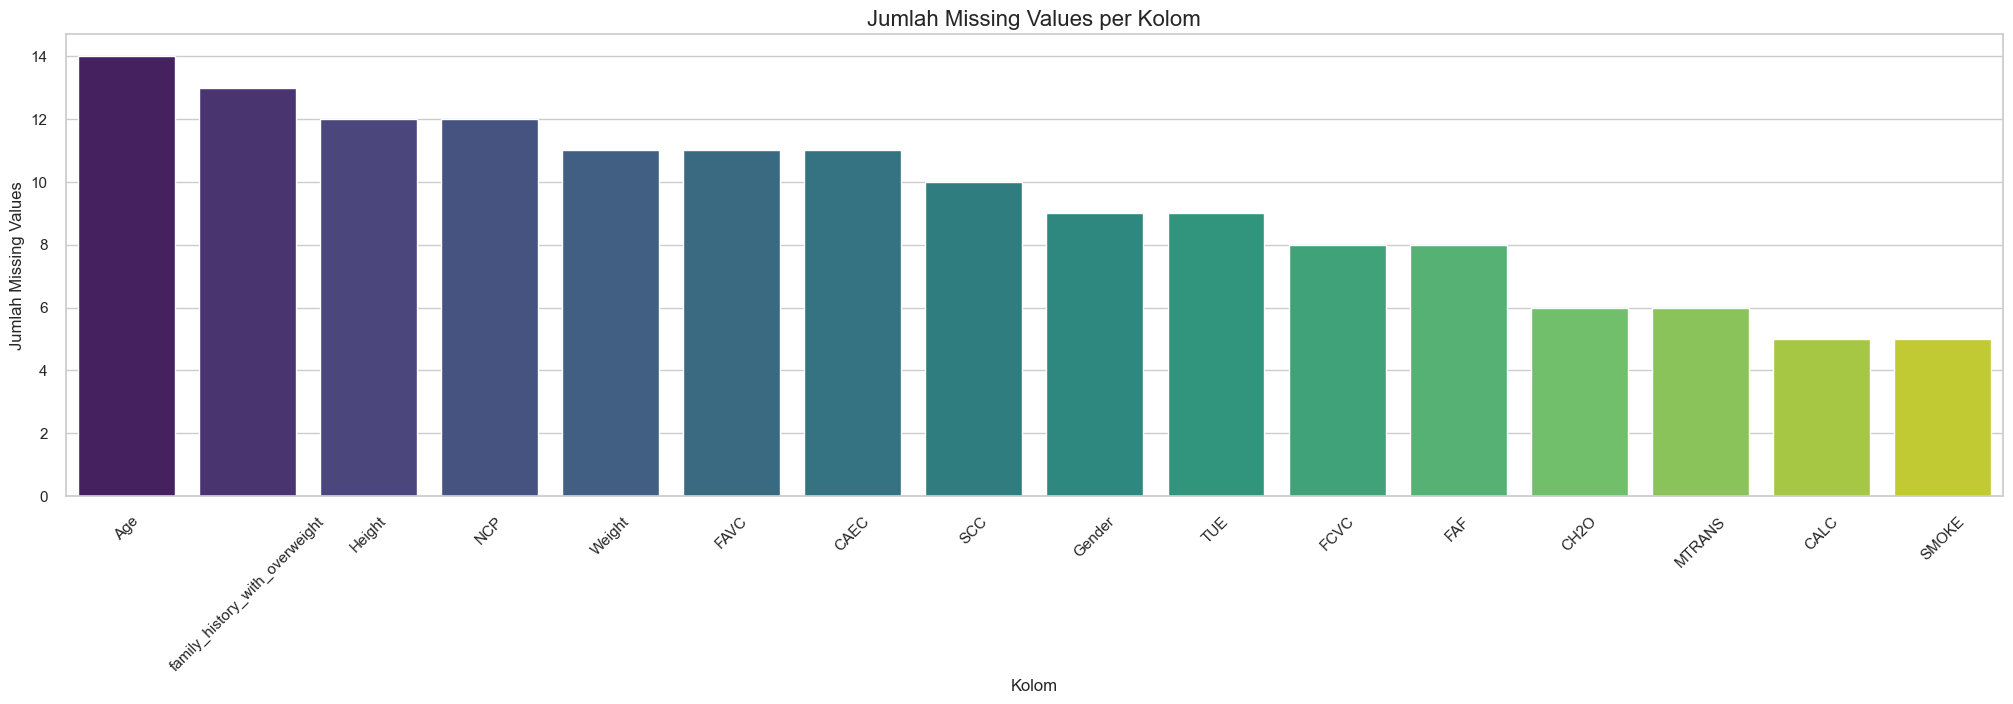

In [5]:
# Cek Missing Values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(25, 6))
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
if len(missing_values) > 0:
    sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
    plt.title('Jumlah Missing Values per Kolom', fontsize=16)
    plt.xlabel('Kolom', fontsize=12)
    plt.ylabel('Jumlah Missing Values', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Tidak ada missing values dalam dataset")


In [6]:
# Cek Duplikasi Data
print(f"\nJumlah data duplikat: {df.duplicated().sum()}")


Jumlah data duplikat: 18



Distribusi target 'NObeyesdad':
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Persentase:
NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: count, dtype: float64


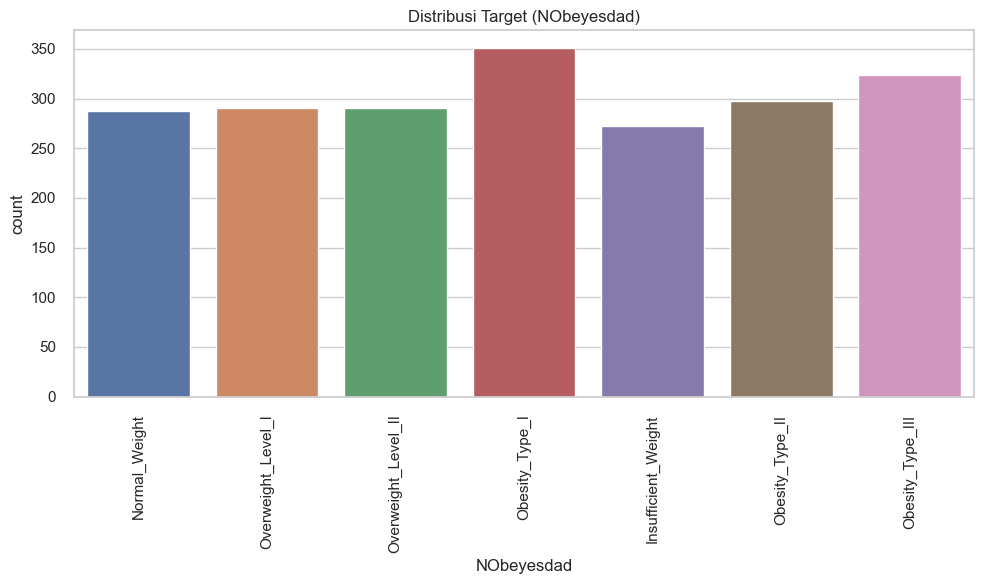

In [7]:
# Analisis Variabel Target
print("\nDistribusi target 'NObeyesdad':")
target_counts = df['NObeyesdad'].value_counts()
print(target_counts)
print("\nPersentase:")
print(target_counts / len(df) * 100)

# Visualisasi target
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribusi Target (NObeyesdad)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

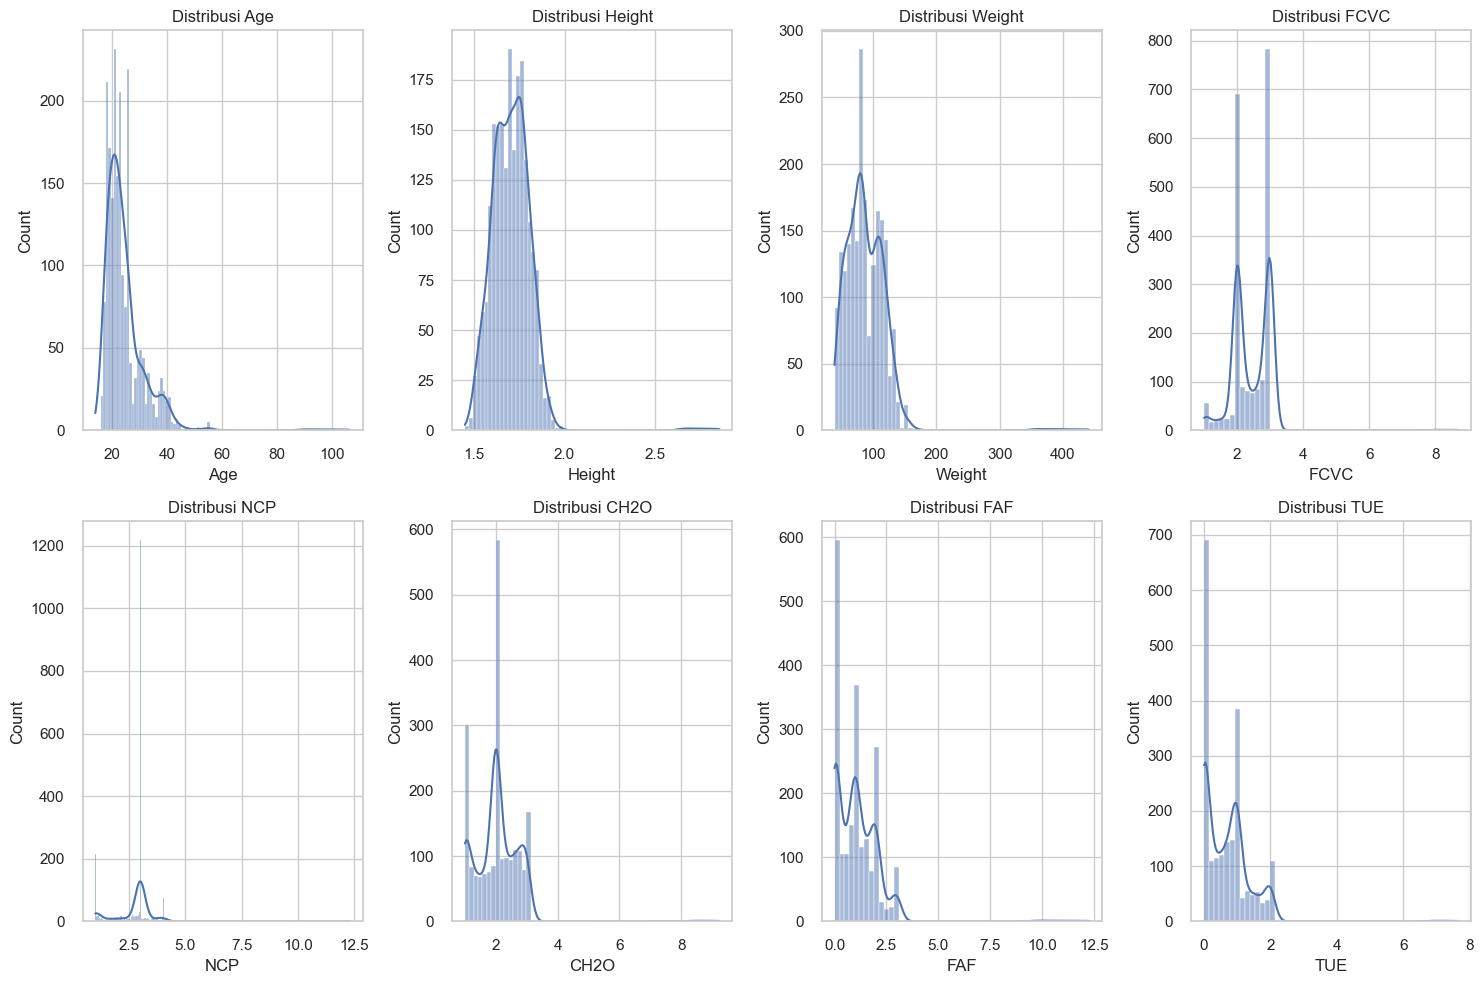

In [8]:
# Visualisasi Data Numerik
# Konversi numerik untuk visualisasi
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Visualisasi distribusi kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

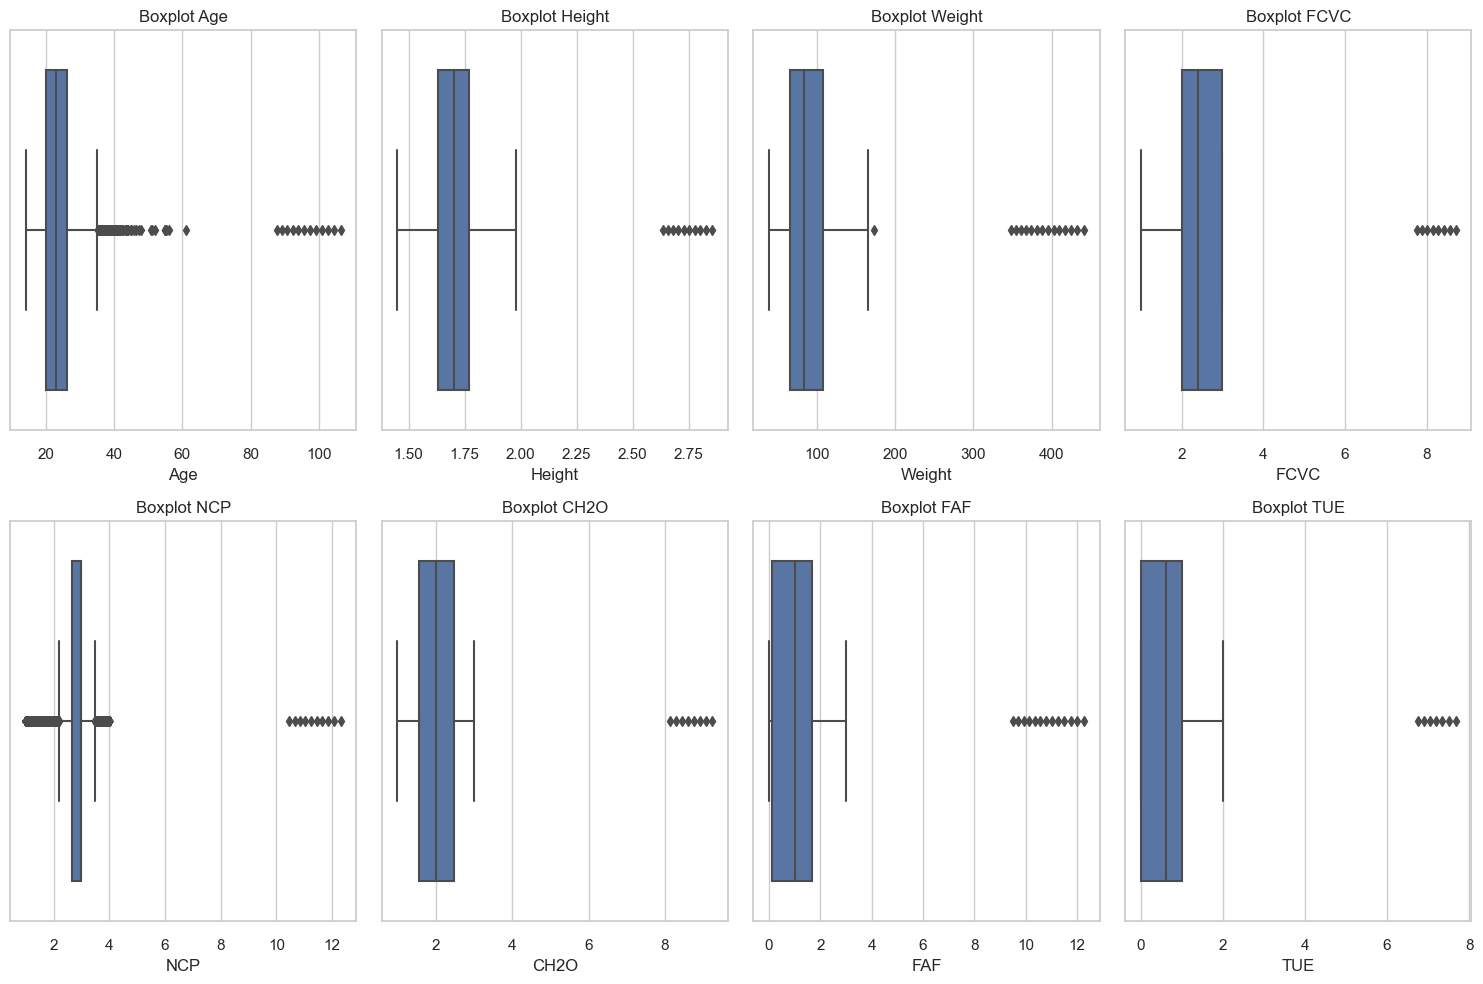

In [9]:
# Visualisasi Outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

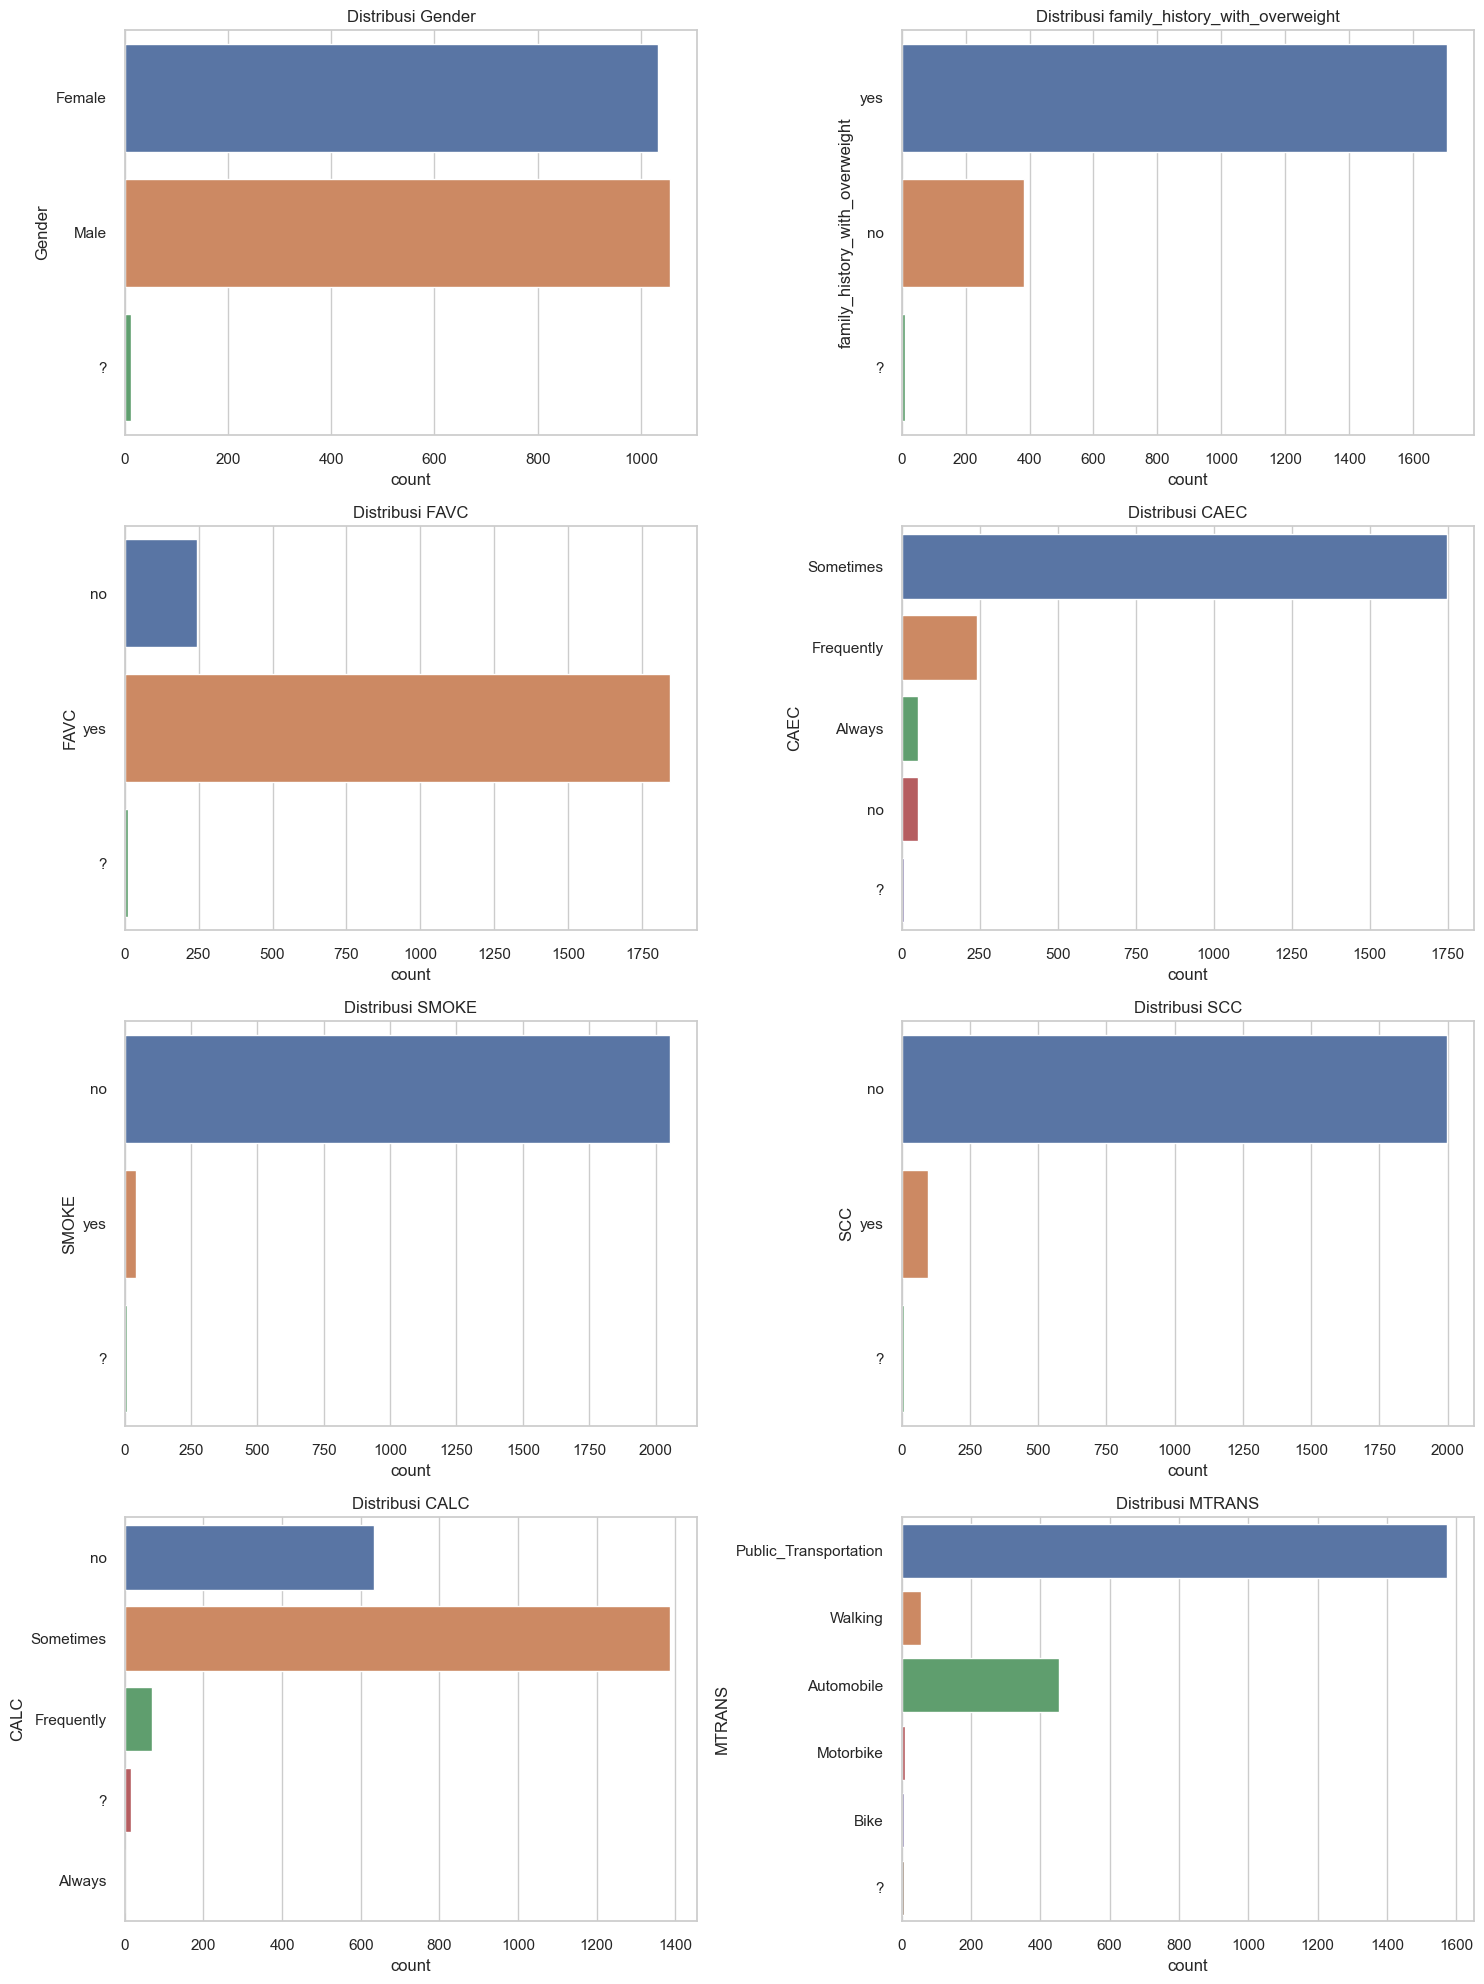

In [10]:
# Distribusi Kategorikal
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(y=df[col])
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.show()

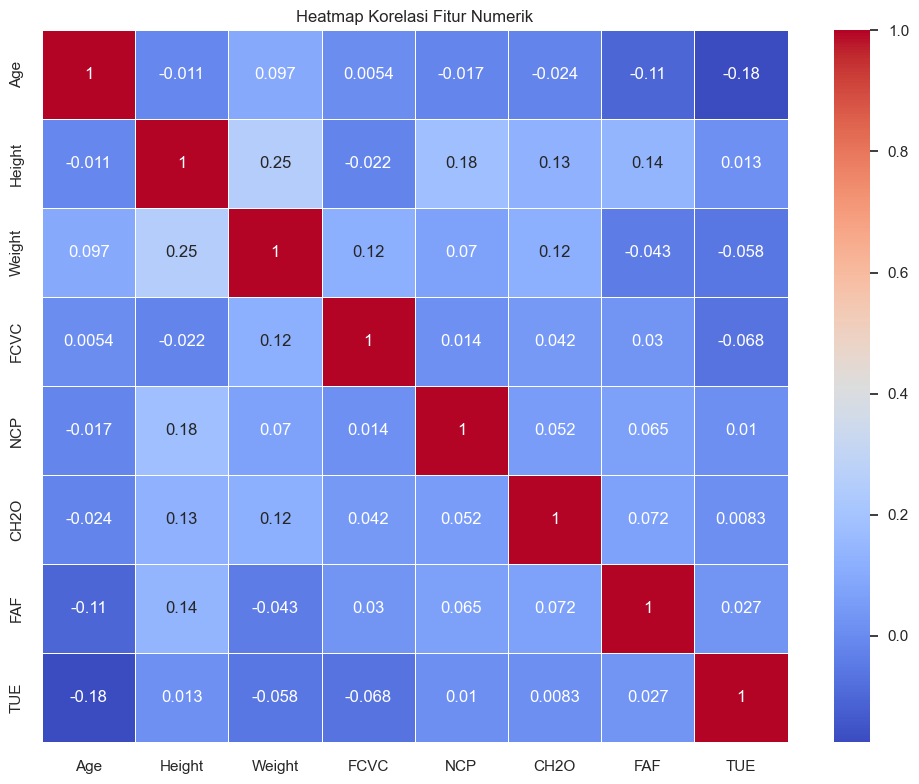

In [11]:
# Korelasi antar fitur
# Ambil data numerik yang sudah dikonversi
df_numeric = df[numeric_cols].copy()

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

# PREPROCESSING

In [12]:
# Handling Missing Values
df_clean = df.copy()

# Penanganan missing values untuk kolom numerik
for col in numeric_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Penanganan missing values untuk kolom kategorikal
cat_cols = [col for col in df.columns if col not in numeric_cols and col != 'NObeyesdad']
for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Cek missing values setelah dihandle
print("\nMissing values setelah dihandle:")
print(df_clean.isnull().sum().sum())


Missing values setelah dihandle:
0


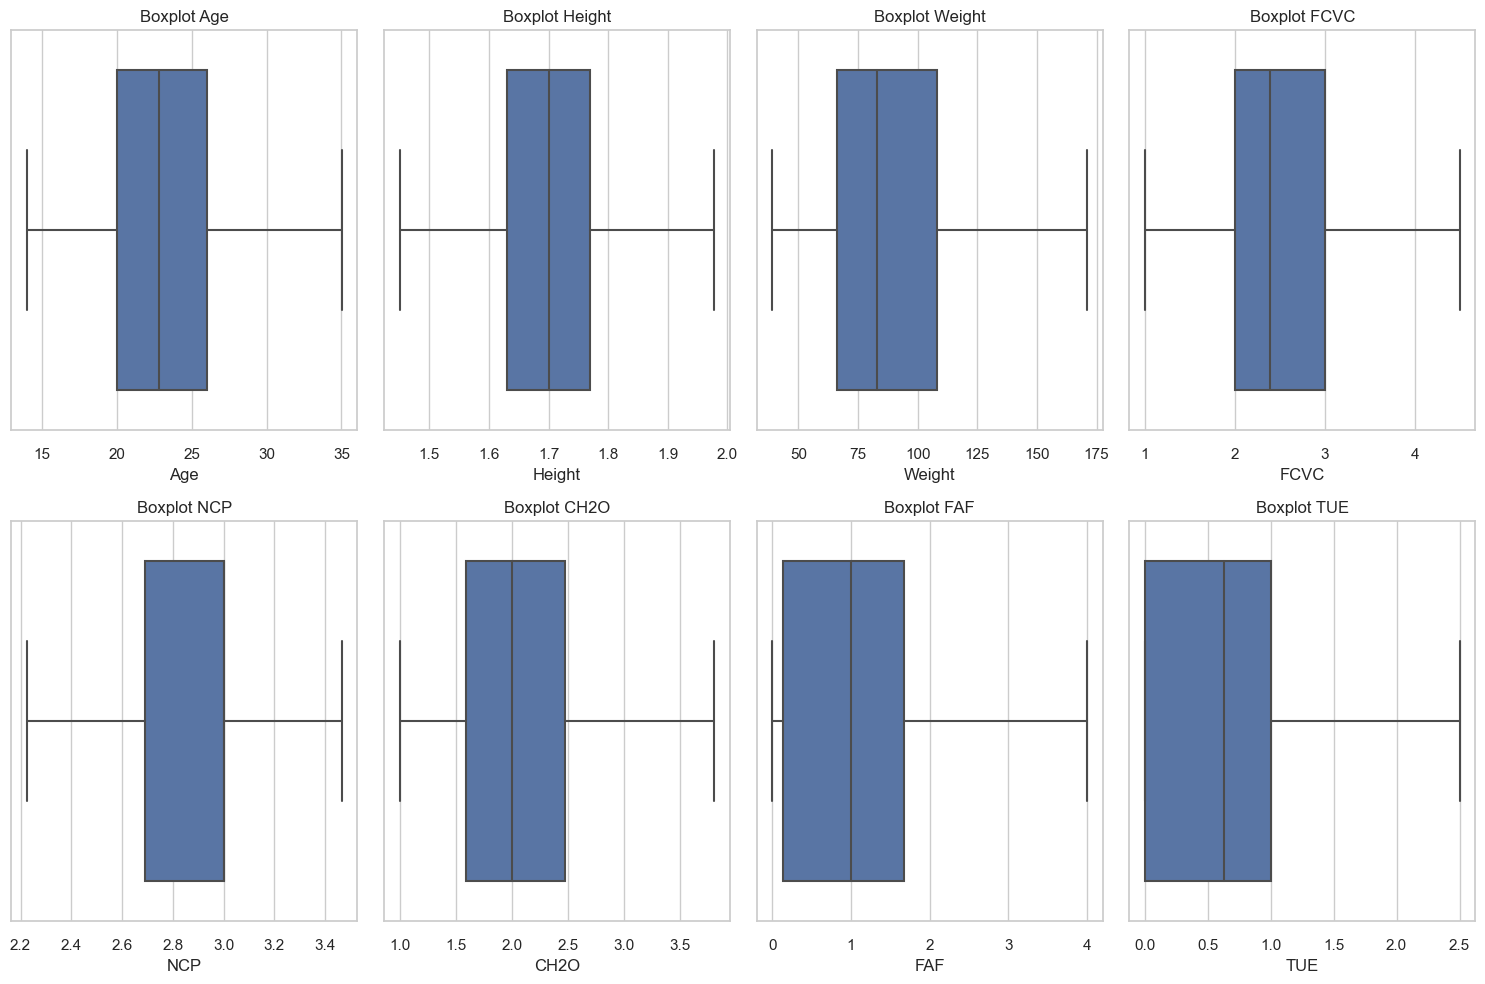

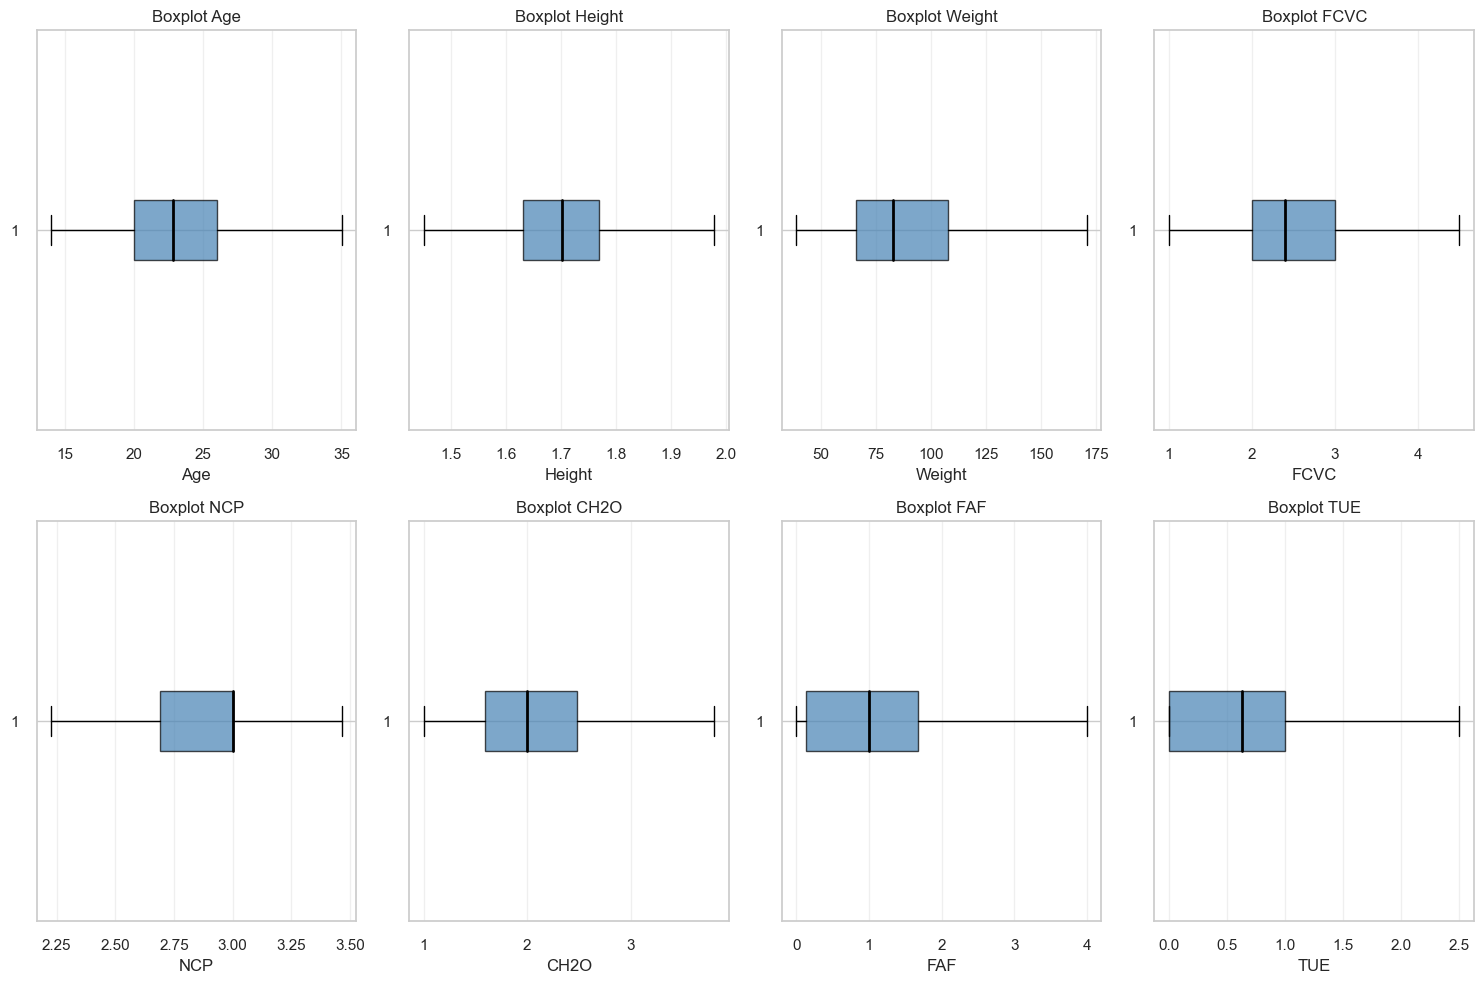

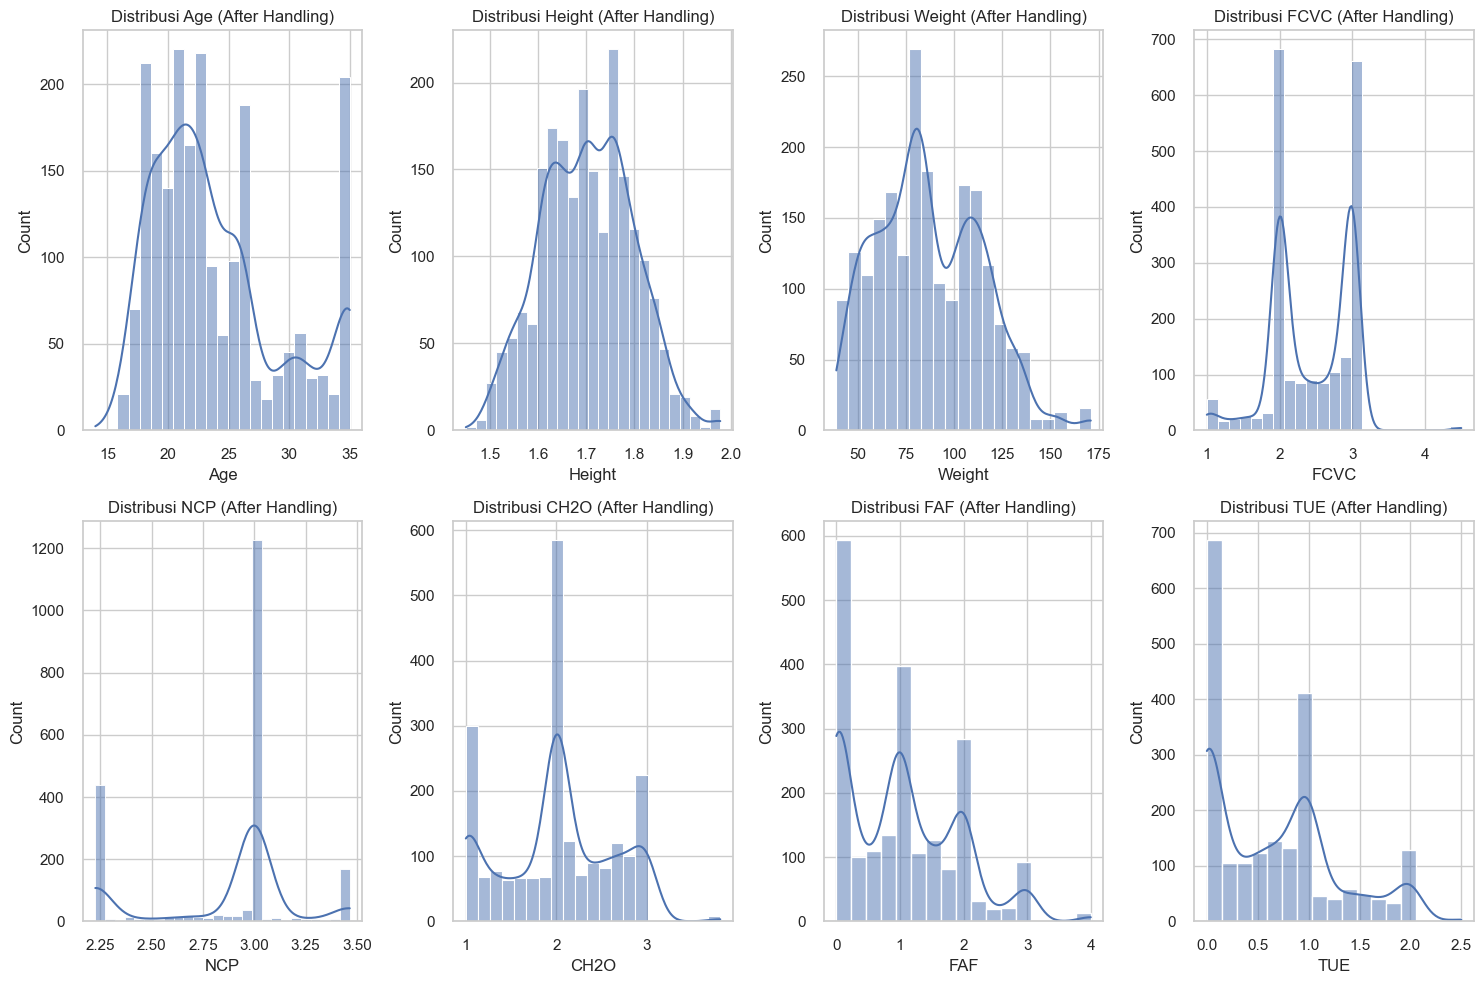

In [13]:
# Handling Outlier dengan IQR
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound,
                              np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col]))

# Visualisasi boxplot setelah handling outlier (HORIZONTAL/LANDSCAPE)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df_clean[col], orient='h')  # Menggunakan x= dan orient='h' untuk horizontal
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Alternatif: Jika ingin lebih mirip dengan gambar referensi
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df_clean[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='steelblue', alpha=0.7),
                medianprops=dict(color='black', linewidth=2))
    plt.xlabel(col)
    plt.title(f'Boxplot {col}')
    plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Tambahan visualisasi distribusi setelah handling outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribusi {col} (After Handling)')
plt.tight_layout()
plt.show()

In [14]:
# Encoding Kategorikal
le_target = LabelEncoder()
df_clean['NObeyesdad_encoded'] = le_target.fit_transform(df_clean['NObeyesdad'])

# Mapping kategori target
target_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
print("\nTarget encoding mapping:")
for original, encoded in target_mapping.items():
    print(f"{original} -> {encoded}")


Target encoding mapping:
Insufficient_Weight -> 0
Normal_Weight -> 1
Obesity_Type_I -> 2
Obesity_Type_II -> 3
Obesity_Type_III -> 4
Overweight_Level_I -> 5
Overweight_Level_II -> 6


In [15]:
# Splitting fitur dan target
X = df_clean.drop(['NObeyesdad', 'NObeyesdad_encoded'], axis=1)
y = df_clean['NObeyesdad_encoded']

In [16]:
def balanced_train_test_split(X, y, test_size=0.2, random_state=None):
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)
    
    # Determine test set size for each class to ensure balanced support
    # We'll take an equal number of samples from each class for the test set
    class_counts = pd.Series(y).value_counts()
    min_class_count = int(min(class_counts) * test_size)
    
    # Initialize empty indices for train and test sets
    test_indices = []
    train_indices = []
    
    # For each class, select samples for test and train
    for cls in unique_classes:
        # Get indices of samples in this class
        cls_indices = np.where(y == cls)[0]
        np.random.seed(random_state)
        np.random.shuffle(cls_indices)
        
        # Take the same number of samples from each class for the test set
        test_indices.extend(cls_indices[:min_class_count])
        train_indices.extend(cls_indices[min_class_count:])
    
    # Convert to train and test sets
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    print(f"Train set distribution: {pd.Series(y_train).value_counts()}")
    print(f"Test set distribution: {pd.Series(y_test).value_counts()}")
    
    return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = balanced_train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nBentuk data train: {X_train.shape}")
print(f"Bentuk data test: {X_test.shape}")

Train set distribution: NObeyesdad_encoded
2    297
4    270
3    243
5    236
6    236
1    233
0    218
Name: count, dtype: int64
Test set distribution: NObeyesdad_encoded
0    54
1    54
2    54
3    54
4    54
5    54
6    54
Name: count, dtype: int64

Bentuk data train: (1733, 16)
Bentuk data test: (378, 16)


In [18]:
# Identifikasi kolom kategorikal dan numerik
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kolom transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Transformasi Data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
print(f"\nBentuk data train setelah transformasi: {X_train_transformed.shape}")
print(f"Bentuk data test setelah transformasi: {X_test_transformed.shape}")


Bentuk data train setelah transformasi: (1733, 39)
Bentuk data test setelah transformasi: (378, 39)


In [19]:
# Handling Imbalance Data
print("\nDistribusi kelas sebelum SMOTE:")
print(pd.Series(y_train).value_counts())

# Aplikasikan SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Distribusi kelas sebelum SMOTE:
NObeyesdad_encoded
2    297
4    270
3    243
5    236
6    236
1    233
0    218
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
NObeyesdad_encoded
0    297
1    297
2    297
3    297
4    297
5    297
6    297
Name: count, dtype: int64


# MODELLING

In [20]:
# Model Definition
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}